In [1]:
import pandas as pd
import numpy as np

In [2]:
file=pd.DataFrame({'Depth': [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000],
 'Shale_pressure_gradient': [0.45,0.45, 0.45,0.46,0.48,0.51,0.55,0.61,0.68,0.76],
 'Fracture_pressure_gradient': [0.45,0.5,0.60,0.69,0.75,0.78,0.81,0.83,0.84,0.85]})

In [3]:
file.head()

,Depth,Shale_pressure_gradient,Fracture_pressure_gradient
0,0,0.45,0.45
1,1000,0.45,0.50
2,2000,0.45,0.60
3,3000,0.46,0.69
4,4000,0.48,0.75


In [4]:
file['Fracture_pressure']=file.Depth*file.Fracture_pressure_gradient
file['Shale_pressure']=file.Depth*file.Shale_pressure_gradient
file['gas_pressure']=4270-(7000-file.Depth)*0.2
file['water_pressure']=4270-(7000-file.Depth)*0.46
file['gass_pressure_at_6000']=3300-(6000-file.Depth)*0.2
file['gas_pressure_at_8000']=5440-(8000-file.Depth)*0.2

In [5]:
file

,Depth,Shale_pressure_gradient,Fracture_pressure_gradient,Fracture_pressure,Shale_pressure,gas_pressure,water_pressure,gass_pressure_at_6000,gas_pressure_at_8000
0,0,0.45,0.45,0.0,0.0,2870.0,1050.0,2100.0,3840.0
1,1000,0.45,0.50,500.0,450.0,3070.0,1510.0,2300.0,4040.0
2,2000,0.45,0.60,1200.0,900.0,3270.0,1970.0,2500.0,4240.0
3,3000,0.46,0.69,2070.0,1380.0,3470.0,2430.0,2700.0,4440.0
4,4000,0.48,0.75,3000.0,1920.0,3670.0,2890.0,2900.0,4640.0
5,5000,0.51,0.78,3900.0,2550.0,3870.0,3350.0,3100.0,4840.0
6,6000,0.55,0.81,4860.0,3300.0,4070.0,3810.0,3300.0,5040.0
7,7000,0.61,0.83,5810.0,4270.0,4270.0,4270.0,3500.0,5240.0
8,8000,0.68,0.84,6720.0,5440.0,4470.0,4730.0,3700.0,5440.0
9,9000,0.76,0.85,7650.0,6840.0,4670.0,5190.0,3900.0,5640.0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
first_centeroid=pd.DataFrame({'gas_pressure':[3870.0,4070.0,4270.0],
            'depth':[ 5000,6000,7000]})
first_centeroid

,gas_pressure,depth
0,3870.0,5000
1,4070.0,6000
2,4270.0,7000


In [8]:
file.Depth[5:8]

5    5000
6    6000
7    7000
Name: Depth, dtype: int64

In [9]:
file.water_pressure[5:9].to_list()

[3350.0, 3810.0, 4270.0, 4730.0]

In [10]:
water=pd.DataFrame({'water_pressure':[3350.0, 3810.0, 4270.0, 4730.0],
                    'Depth':[5000, 6000, 7000, 8000]})
water

,water_pressure,Depth
0,3350.0,5000
1,3810.0,6000
2,4270.0,7000
3,4730.0,8000


In [11]:
file.gass_pressure_at_6000[4:7].to_list()

[2900.0, 3100.0, 3300.0]

In [12]:
gas600=pd.DataFrame({'gas_pre':[2900.0, 3100.0, 3300.0],
                    'Depth':[4000, 5000, 6000]})

In [13]:
file.gas_pressure_at_8000[6:9].to_list()

[5040.0, 5240.0, 5440.0]

In [14]:
gas800=pd.DataFrame({'gas_pre':[5040.0, 5240.0, 5440.0],
                    'Depth':[6000, 7000, 8000]})

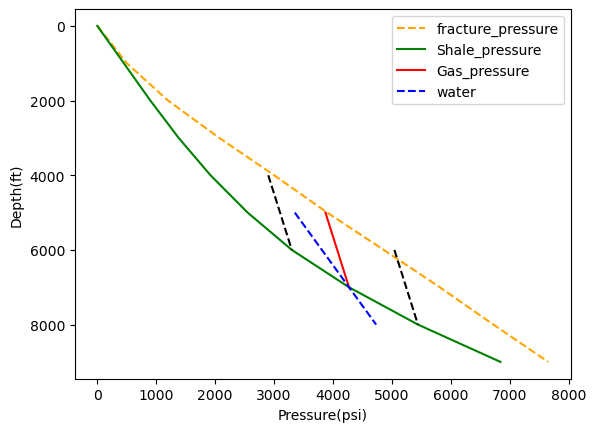

In [27]:
sns.lineplot(y='Depth',x='Fracture_pressure',data=file,label='fracture_pressure',linestyle='--',color='orange')
sns.lineplot(y='Depth',x='Shale_pressure',data=file,label='Shale_pressure',color='green')
sns.lineplot(x='gas_pressure',y='depth',data=first_centeroid,label='Gas_pressure',color='red')
sns.lineplot(x='gas_pre',y='Depth',data=gas600,linestyle='--',color='black')
sns.lineplot(x='gas_pre',y='Depth',data=gas800,linestyle='--',color='black')
sns.lineplot(x='water_pressure',y='Depth',data=water,color='blue',linestyle='--',label='water')
plt.gca().invert_yaxis()
plt.xlabel('Pressure(psi)')
plt.ylabel('Depth(ft)')
plt.show()